In [1]:
import ROOT
import numpy as np
from array import array
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746


In [18]:
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
leg_tags = ['IHCal','Full Calorimeter','OHCal','EMCal','HCal']
emcal_detdeta_hijing = []
ihcal_detdeta_hijing = []
ohcal_detdeta_hijing = []
calo_detdeta_hijing = []
hcal_detdeta_hijing = []
emcal_unc = []
ihcal_unc = []
ohcal_unc = []
calo_unc = []
hcal_unc = []

for i, cent in enumerate(cents):
    infile = 'dETdeta_plots_w_hijing_reweight_updated_centrality_p015_w_hcal_'+cent+'.root'
    f1 = ROOT.TFile.Open(infile)
    emcal_detdeta_hijing.append(TH1F(f1.Get("emcal_detdeta_hijing")))
    ihcal_detdeta_hijing.append(TH1F(f1.Get("ihcal_detdeta_hijing")))
    ohcal_detdeta_hijing.append(TH1F(f1.Get("ohcal_detdeta_hijing")))
    calo_detdeta_hijing.append(TH1F(f1.Get("calo_detdeta_hijing")))
    hcal_detdeta_hijing.append(TH1F(f1.Get("hcal_detdeta_hijing")))
    emcal_detdeta_hijing[i].SetDirectory(0)
    ihcal_detdeta_hijing[i].SetDirectory(0)
    ohcal_detdeta_hijing[i].SetDirectory(0)
    calo_detdeta_hijing[i].SetDirectory(0)
    hcal_detdeta_hijing[i].SetDirectory(0)
    f1.Close()
    f5 = ROOT.TFile.Open("dETdeta_total_variation_w_hcal_"+cent+".root")
    emcal_unc.append(TH1F(f5.Get("emcal_detdeta_dev")))
    ihcal_unc.append(TH1F(f5.Get("ihcal_detdeta_dev")))
    ohcal_unc.append(TH1F(f5.Get("ohcal_detdeta_dev")))
    calo_unc.append(TH1F(f5.Get("calo_detdeta_dev")))
    hcal_unc.append(TH1F(f5.Get("hcal_detdeta_dev")))
    emcal_unc[i].SetDirectory(0)
    ihcal_unc[i].SetDirectory(0)
    ohcal_unc[i].SetDirectory(0)
    calo_unc[i].SetDirectory(0)
    hcal_unc[i].SetDirectory(0)
    f5.Close()

In [19]:
# sphenix values
Npart = [349,295,228,158,105,66,37]
half_npart = [174.5,147.5,114,79,52.5,33.0,18.5]
Npart_error = [4.7,6.6,7.3,7.1,6.9,5.6,5]

# old sphenix values
#Npart = [349,299,231,161,108,66,38]
#half_npart = [174.5,149.5,115.5,80.5,54.0,33.0,19.0]
#Npart_error = [4.7,6.6,7.3,7.1,6.9,5.6,5]

Npartarray = array('f', Npart)
Npart_error_array = array('f', Npart_error)

In [20]:
star_npart = [352,299,234,166,115,76,47]
star_npart_error = [3,7,8,9,9,8,8]
phenix_npart = [350.9,297,231,161.6,109.6,70.3,41.6]
phenix_npart_error = [4.7,6.6,7.3,7.1,6.9,5.6,5]

In [21]:
emcal_detdeta_hijing_mean = []
ihcal_detdeta_hijing_mean = []
ohcal_detdeta_hijing_mean = []
calo_detdeta_hijing_mean = []
hcal_detdeta_hijing_mean = []
emcal_detdeta_npart = []
ihcal_detdeta_npart = []
ohcal_detdeta_npart = []
calo_detdeta_npart = []
hcal_detdeta_npart = []
emcal_detdeta_npart_stat = []
ihcal_detdeta_npart_stat = []
ohcal_detdeta_npart_stat = []
calo_detdeta_npart_stat = []
hcal_detdeta_npart_stat = []
    
for i in range(len(cents)):
    emcal_detdeta_hijing_mean.append(0)
    ihcal_detdeta_hijing_mean.append(0)
    ohcal_detdeta_hijing_mean.append(0)
    calo_detdeta_hijing_mean.append(0)
    hcal_detdeta_hijing_mean.append(0)
    emcal_detdeta_npart.append(0)
    ihcal_detdeta_npart.append(0)
    ohcal_detdeta_npart.append(0)
    calo_detdeta_npart.append(0)
    hcal_detdeta_npart.append(0)
    emcal_detdeta_npart_stat.append(0)
    ihcal_detdeta_npart_stat.append(0)
    ohcal_detdeta_npart_stat.append(0)
    calo_detdeta_npart_stat.append(0)
    hcal_detdeta_npart_stat.append(0)
    for j in range(3, 25):
        emcal_detdeta_hijing_mean[i] += emcal_detdeta_hijing[i].GetBinContent(j)/22.0
        calo_detdeta_hijing_mean[i] += calo_detdeta_hijing[i].GetBinContent(j)/22.0
        emcal_detdeta_npart_stat[i] += emcal_detdeta_hijing[i].GetBinError(j)/(22.0*half_npart[i])
        calo_detdeta_npart_stat[i] += calo_detdeta_hijing[i].GetBinError(j)/(22.0*half_npart[i])
        emcal_detdeta_npart[i] += emcal_detdeta_hijing[i].GetBinContent(j)/(22.0*half_npart[i])
        calo_detdeta_npart[i] += calo_detdeta_hijing[i].GetBinContent(j)/(22.0*half_npart[i])
    for j in range(1,25):
        ihcal_detdeta_hijing_mean[i] += ihcal_detdeta_hijing[i].GetBinContent(j)/24.0
        ohcal_detdeta_hijing_mean[i] += ohcal_detdeta_hijing[i].GetBinContent(j)/24.0
        hcal_detdeta_hijing_mean[i] += hcal_detdeta_hijing[i].GetBinContent(j)/24.0
        ihcal_detdeta_npart[i] += ihcal_detdeta_hijing[i].GetBinContent(j)/(24.0*half_npart[i])
        ohcal_detdeta_npart[i] += ohcal_detdeta_hijing[i].GetBinContent(j)/(24.0*half_npart[i])
        hcal_detdeta_npart[i] += hcal_detdeta_hijing[i].GetBinContent(j)/(24.0*half_npart[i])
        ihcal_detdeta_npart_stat[i] += ihcal_detdeta_hijing[i].GetBinError(j)/(24.0*half_npart[i])
        ohcal_detdeta_npart_stat[i] += ohcal_detdeta_hijing[i].GetBinError(j)/(24.0*half_npart[i])
        hcal_detdeta_npart_stat[i] += hcal_detdeta_hijing[i].GetBinError(j)/(24.0*half_npart[i])

print(emcal_detdeta_npart)
eh = array('f', emcal_detdeta_hijing_mean)
ih = array('f', ihcal_detdeta_hijing_mean)
h = array('f', hcal_detdeta_hijing_mean)
oh = array('f', ohcal_detdeta_hijing_mean)
ch = array('f', calo_detdeta_hijing_mean)
arrays = [h, oh, ch, eh]
enh = array('f', emcal_detdeta_npart)
inh = array('f', ihcal_detdeta_npart)
onh = array('f', ohcal_detdeta_npart)
cnh = array('f', calo_detdeta_npart)
arrays_npart = [inh, cnh, onh, enh]
enhstat = array('f', emcal_detdeta_npart_stat)
inhstat = array('f', ihcal_detdeta_npart_stat)
onhstat = array('f', ohcal_detdeta_npart_stat)
cnhstat = array('f', calo_detdeta_npart_stat)
arrays_npart_stat = [inhstat, cnhstat, onhstat, enhstat]

[3.850005205238384, 3.763919815039965, 3.6289874355188396, 3.4179221659178567, 3.209965759541565, 3.000692961301358, 2.9048456290430167]


In [22]:
lists = [
    emcal_detdeta_hijing_mean,
    ihcal_detdeta_hijing_mean,
    ohcal_detdeta_hijing_mean,
    calo_detdeta_hijing_mean,
    hcal_detdeta_hijing_mean
]

for lst in lists:
    formatted_values = [f"{num:.2f}" for num in lst]
    print(formatted_values)


['671.83', '555.18', '413.70', '270.02', '168.52', '99.02', '53.74']
['717.75', '587.24', '436.75', '287.30', '182.49', '108.27', '59.19']
['666.74', '544.67', '403.27', '263.39', '165.59', '97.39', '52.77']
['664.86', '556.86', '412.11', '270.62', '169.61', '99.33', '53.78']
['678.75', '554.70', '411.12', '268.94', '169.49', '99.89', '54.24']


NameError: name 'hcal_detdeta_hijing_error' is not defined

In [23]:
emcal_detdeta_hijing_error = []
ihcal_detdeta_hijing_error = []
ohcal_detdeta_hijing_error = []
calo_detdeta_hijing_error = []
hcal_detdeta_hijing_error = []

emcal_detdeta_npart_error = []
ihcal_detdeta_npart_error = []
ohcal_detdeta_npart_error = []
calo_detdeta_npart_error = []
    
for i in range(len(cents)):
    emcal_detdeta_hijing_error.append(0)
    ihcal_detdeta_hijing_error.append(0)
    ohcal_detdeta_hijing_error.append(0)
    calo_detdeta_hijing_error.append(0)
    emcal_detdeta_npart_error.append(0)
    ihcal_detdeta_npart_error.append(0)
    ohcal_detdeta_npart_error.append(0)
    calo_detdeta_npart_error.append(0)
    hcal_detdeta_hijing_error.append(0)
    for j in range(3, 25):
        emcal_detdeta_hijing_error[i] += emcal_unc[i].GetBinContent(j)/22.0
        ihcal_detdeta_hijing_error[i] += ihcal_unc[i].GetBinContent(j)/22.0
        ohcal_detdeta_hijing_error[i] += ohcal_unc[i].GetBinContent(j)/22.0
        calo_detdeta_hijing_error[i] += calo_unc[i].GetBinContent(j)/22.0
        emcal_detdeta_npart_error[i] += emcal_unc[i].GetBinContent(j)/(22.0*half_npart[i])
        ihcal_detdeta_npart_error[i] += ihcal_unc[i].GetBinContent(j)/(22.0*half_npart[i])
        ohcal_detdeta_npart_error[i] += ohcal_unc[i].GetBinContent(j)/(22.0*half_npart[i])
        calo_detdeta_npart_error[i] += calo_unc[i].GetBinContent(j)/(22.0*half_npart[i])
    for j in range(1, 25):
        hcal_detdeta_hijing_error[i] += hcal_unc[i].GetBinContent(j)/24.0

ehe = array('f', emcal_detdeta_hijing_error)
ihe = array('f', ihcal_detdeta_hijing_error)
ohe = array('f', ohcal_detdeta_hijing_error)
che = array('f', calo_detdeta_hijing_error)
error_arrays = [ihe, che, ohe, ehe]
enhe = array('f', emcal_detdeta_npart_error)
inhe = array('f', ihcal_detdeta_npart_error)
onhe = array('f', ohcal_detdeta_npart_error)
cnhe = array('f', calo_detdeta_npart_error)
error_arrays_npart = [inhe, cnhe, onhe, enhe]

In [15]:
print(hcal_detdeta_hijing_error)

[35.39291397730509, 29.252077579498295, 20.164038101832077, 12.71397177378337, 8.40741693973541, 5.626773079236349, 3.636938790480295]


In [24]:
emcal_detdeta_npart_total_error = []
ihcal_detdeta_npart_total_error = []
ohcal_detdeta_npart_total_error = []
calo_detdeta_npart_total_error = []
    
for i in range(len(cents)):
    emcal_val = emcal_detdeta_hijing_mean[i]/half_npart[i]
    emcal_rel_err = (emcal_detdeta_hijing_error[i]/emcal_detdeta_hijing_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    emcal_detdeta_npart_total_error.append(emcal_val*np.sqrt(emcal_rel_err))
    ihcal_val = ihcal_detdeta_hijing_mean[i]/half_npart[i]
    ihcal_rel_err = (ihcal_detdeta_hijing_error[i]/ihcal_detdeta_hijing_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    ihcal_detdeta_npart_total_error.append(ihcal_val*np.sqrt(ihcal_rel_err))
    ohcal_val = ohcal_detdeta_hijing_mean[i]/half_npart[i]
    ohcal_rel_err = (ohcal_detdeta_hijing_error[i]/ohcal_detdeta_hijing_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    ohcal_detdeta_npart_total_error.append(ohcal_val*np.sqrt(ohcal_rel_err))
    calo_val = calo_detdeta_hijing_mean[i]/half_npart[i]
    calo_rel_err = (calo_detdeta_hijing_error[i]/calo_detdeta_hijing_mean[i])**2 + (Npart_error[i]/Npart[i])**2
    calo_detdeta_npart_total_error.append(calo_val*np.sqrt(calo_rel_err))

enhte = array('f', emcal_detdeta_npart_total_error)
inhte = array('f', ihcal_detdeta_npart_total_error)
onhte = array('f', ohcal_detdeta_npart_total_error)
cnhte = array('f', calo_detdeta_npart_total_error)
total_error_arrays = [inhte, cnhte, onhte, enhte]

In [25]:
for i in range(7):
    print(emcal_detdeta_hijing_error[i]/emcal_detdeta_hijing_mean[i])
    print(ohcal_detdeta_hijing_error[i]/ohcal_detdeta_hijing_mean[i])
    print(calo_detdeta_hijing_error[i]/calo_detdeta_hijing_mean[i])
    print()

0.037477748543457964
0.05385926452935997
0.04031532269811354

0.03891278081615763
0.05499303006185967
0.04029320490588334

0.03863586648531618
0.05132511817283867
0.03914669994046705

0.040067039021938845
0.049619091771484214
0.04037331125295467

0.04164679754315051
0.05231436444072367
0.04180433539094398

0.04497785713652079
0.05904401320116291
0.045108377817164154

0.05291011279173118
0.06949476136917618
0.05173348377241058



In [26]:
for i in range(7):
    print(emcal_detdeta_npart_total_error[i]/emcal_detdeta_npart[i])
    print(ohcal_detdeta_npart_total_error[i]/ohcal_detdeta_npart[i])
    print(calo_detdeta_npart_total_error[i]/calo_detdeta_npart[i])
    print()

0.03982390032204763
0.05551740066517245
0.04250513669224872

0.04488597031381793
0.059369850728726116
0.04608783116782692

0.05017821533171276
0.06049289933752893
0.05057259367516678

0.06020527733697629
0.06694297626684691
0.06040953620716366

0.07779989134014867
0.08399500029034838
0.07788433606584384

0.0960326663884578
0.10337050292991062
0.09609386624743325

0.14512403241236427
0.15195731836851417
0.14469919865438613



In [27]:
upper_emcal_error = []
lower_emcal_error = []
upper_ihcal_error = []
lower_ihcal_error = []
upper_ohcal_error = []
lower_ohcal_error = []
upper_calo_error = []
lower_calo_error = []
for i in range(len(emcal_detdeta_npart)):
    upper_emcal_error.append(emcal_detdeta_npart[i] + emcal_detdeta_npart_total_error[i])
    lower_emcal_error.append(emcal_detdeta_npart[i] - emcal_detdeta_npart_total_error[i])
for i in range(len(ihcal_detdeta_npart)):
    upper_ihcal_error.append(ihcal_detdeta_npart[i] + ihcal_detdeta_npart_total_error[i])
    lower_ihcal_error.append(ihcal_detdeta_npart[i] - ihcal_detdeta_npart_total_error[i])    
for i in range(len(ohcal_detdeta_npart)):
    upper_ohcal_error.append(ohcal_detdeta_npart[i] + ohcal_detdeta_npart_total_error[i])
    lower_ohcal_error.append(ohcal_detdeta_npart[i] - ohcal_detdeta_npart_total_error[i])  
for i in range(len(calo_detdeta_npart)):
    upper_calo_error.append(calo_detdeta_npart[i] + calo_detdeta_npart_total_error[i])
    lower_calo_error.append(calo_detdeta_npart[i] - calo_detdeta_npart_total_error[i]) 
upper_enhe = array('f', upper_emcal_error)
lower_enhe = array('f', lower_emcal_error)
upper_inhe = array('f', upper_ihcal_error)
lower_inhe = array('f', lower_ihcal_error)
upper_onhe = array('f', upper_ohcal_error)
lower_onhe = array('f', lower_ohcal_error)
upper_cnhe = array('f', upper_calo_error)
lower_cnhe = array('f', lower_calo_error)
upper_error_arrays = [upper_inhe, upper_cnhe, upper_onhe, upper_enhe]
lower_error_arrays = [lower_inhe, lower_cnhe, lower_onhe, lower_enhe]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


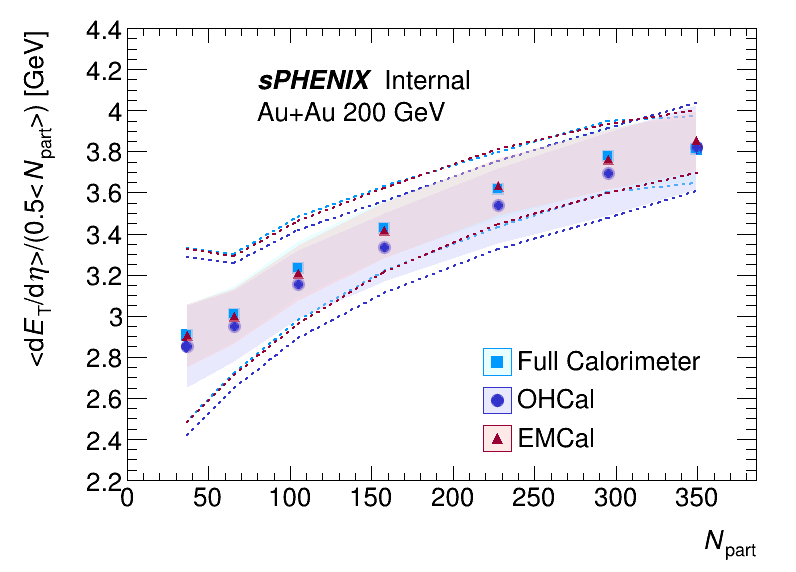

In [28]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graphs", 800, 600)

# Create and plot TGraphs for each array
graphs = []
totalgraph1 = []
totalgraph2 = []
topgraphs = []
colors = [ROOT.kSpring-4, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kPink-6] #, ROOT.kCyan, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
error_colors = [ROOT.kSpring-4, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kRed-10]
shapes = [ROOT.kFullDiamond, ROOT.kFullSquare, ROOT.kFullCircle, 22]
for i, arr in enumerate(arrays_npart):
    graphs.append(ROOT.TGraphErrors(7, Npartarray, arr, Npart_error_array, error_arrays_npart[i]))
    topgraphs.append(ROOT.TGraphErrors(7, Npartarray, arr, 0, arrays_npart_stat[i]))
    totalgraph1.append(ROOT.TGraphErrors(7, Npartarray, upper_error_arrays[i], 0, 0))
    totalgraph2.append(ROOT.TGraphErrors(7, Npartarray, lower_error_arrays[i], 0, 0))
    graphs[i].SetMarkerStyle(shapes[i])
    graphs[i].SetLineColor(colors[i])
    graphs[i].SetFillColorAlpha(error_colors[i],0.4)
    graphs[i].SetMarkerColor(colors[i])
    graphs[i].GetYaxis().SetRangeUser(2.2,4.4)
    topgraphs[i].SetMarkerStyle(shapes[i])
    topgraphs[i].SetLineColor(colors[i])
    topgraphs[i].SetMarkerColor(colors[i])
    topgraphs[i].GetYaxis().SetRangeUser(2.2,4.4)
    totalgraph1[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph1[i].SetLineColor(colors[i])
    totalgraph1[i].SetMarkerColor(colors[i])
    totalgraph1[i].GetYaxis().SetRangeUser(2.2,4.4)
    totalgraph2[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph2[i].SetLineColor(colors[i])
    totalgraph2[i].SetMarkerColor(colors[i])
    totalgraph2[i].GetYaxis().SetRangeUser(2.2,4.4)
    graphs[i].SetMarkerSize(1.5)
    totalgraph1[i].SetLineWidth(2)
    totalgraph2[i].SetLineWidth(2)
    totalgraph1[i].SetLineStyle(2)
    totalgraph2[i].SetLineStyle(2)
    if i == 1:
        topgraphs[i].SetMarkerSize(1)
        totalgraph1[i].SetMarkerSize(1)
        totalgraph2[i].SetMarkerSize(1)
        graphs[i].GetYaxis().SetTitle("<d#it{E}_{T}/d#it{#eta}>/(0.5<#it{N}_{part}>) [GeV]")
        graphs[i].GetXaxis().SetTitle("#it{N}_{part}")
        graphs[i].Draw("A3P")
        totalgraph1[i].Draw("L,same")
        totalgraph2[i].Draw("L,same")
    else:
        if i == 0:
            continue
        graphs[i].Draw("3P,same")
        totalgraph1[i].Draw("L,same")
        totalgraph2[i].Draw("L,same")

for i, graph in enumerate(graphs):
    if i == 0: continue
    topgraphs[i].SetMarkerSize(1.2)
    topgraphs[i].Draw("P,same")

# Set the legend
legend = ROOT.TLegend(0.6, 0.2, 0.8, 0.4)
legend.SetBorderSize(0)
legend.SetTextSize(0.05)
for i, graph in enumerate(graphs):
    if i == 0: continue
    legend.AddEntry(graph,leg_tags[i], "pf")
legend.Draw()

text = ROOT.TLatex()
text.SetTextSize(0.05)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatex(80, 4.15, "#it{#bf{sPHENIX}} Internal")

text2 = ROOT.TLatex()
text2.SetTextSize(0.05)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatex(80, 4.0, "Au+Au 200 GeV")

# Draw the canvas
canvas.Draw()
#canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/dETdeta_Npart_vs_Npart.png")

In [29]:
star_detdeta_npart = [3.51,3.45,3.4,3.31,3.2,3.1,3.0]
star_detdeta_npart_total_error = [0.19,0.2,0.22,0.25,0.3,0.4,0.5]
star_npart = [352,299,234,166,115,76,47]
star_npart_error = [3,7,8,9,9,8,8]
phenix_detdeta_npart = [3.41,3.30,3.18,3.07,2.97,2.87,2.82]
phenix_detdeta_npart_total_error = [0.2,0.21,0.23,0.26,0.31,0.37,0.5]
phenix_npart = [350.9,297,231,161.6,109.6,70.3,41.6]
phenix_npart_error = [4.7,6.6,7.3,7.1,6.9,5.6,5]
star_upper_error = [3.7,3.65,3.62,3.56,3.5,3.5,3.5]
phenix_upper_error = [3.61,3.51,3.41,3.33,3.28,3.24,3.32]
star_lower_error = [3.32,3.25,3.18,3.06,2.9,2.7,2.5]
phenix_lower_error = [3.21,3.09,2.95,2.81,2.66,2.5,2.32]
phenix_detdeta_npart_error = [0.14,0.19,0.2,0.22,0.25,0.28,0.36]
star_detdeta_npart_error = [0.19,0.19,0.18,0.18,0.17,0.16,0.17]
sn = array('f', star_detdeta_npart)
pn = array('f', phenix_detdeta_npart)
sne = array('f', star_detdeta_npart_error)
pne = array('f', phenix_detdeta_npart_error)
snpart = array('f', star_npart)
pnpart = array('f', phenix_npart)
snparterror = array('f', star_npart_error)
pnparterror = array('f', phenix_npart_error)
supper = array('f', star_upper_error)
slower = array('f', star_lower_error)
pupper = array('f', phenix_upper_error)
plower = array('f', phenix_lower_error)

comp_detdeta = [sn, pn, cnh]
comp_detdeta_error = [sne, pne, cnhe]
comp_npart = [snpart, pnpart, Npartarray]
comp_npart_error = [snparterror, pnparterror, Npart_error_array]
comp_npart_upper = [supper, pupper, upper_cnhe]
comp_npart_lower = [slower, plower, lower_cnhe]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/new_centrality/dETdeta_Npart_vs_Npart_detector_comp.png has been created


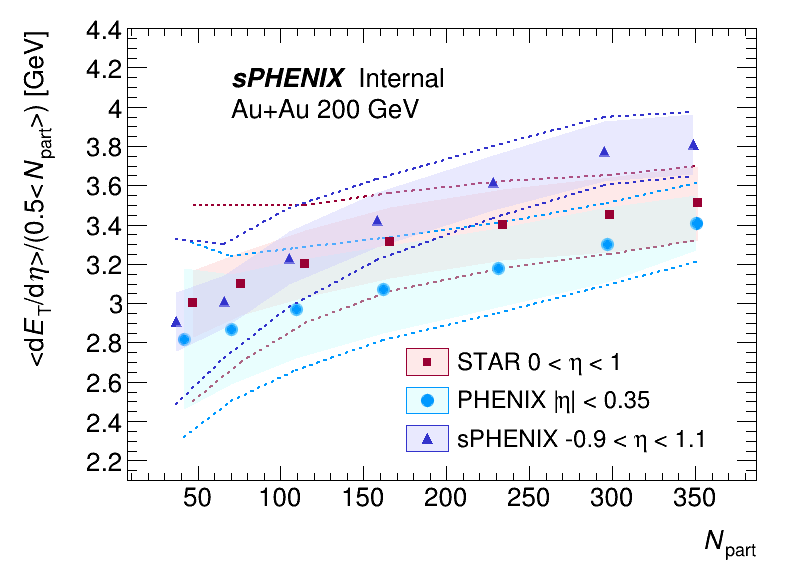

In [31]:
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graphs", 800, 600)
comp_leg_tags = ["STAR 0 < #eta < 1","PHENIX |#eta| < 0.35","sPHENIX -0.9 < #eta < 1.1"]
# Create and plot TGraphs for each array
graphs = []
totalgraph1 = []
totalgraph2 = []
topgraphs = []
colors = [ROOT.kPink-6, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kSpring-4] #, ROOT.kCyan, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
error_colors = [ROOT.kRed-10, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kSpring-4]
shapes = [ROOT.kFullSquare, ROOT.kFullCircle, 22, ROOT.kFullDiamond]

for i, arr in enumerate(comp_detdeta):
    graphs.append(ROOT.TGraphErrors(7, comp_npart[i], arr, comp_npart_error[i], comp_detdeta_error[i]))
    graphs[i].SetMarkerStyle(shapes[i])
    graphs[i].SetLineColor(colors[i])
    graphs[i].SetFillColorAlpha(error_colors[i],0.4)
    graphs[i].SetMarkerColor(colors[i])
    graphs[i].GetYaxis().SetRangeUser(2.1,4.4)
    totalgraph1.append(ROOT.TGraphErrors(7, comp_npart[i], comp_npart_upper[i], 0, 0))
    totalgraph2.append(ROOT.TGraphErrors(7, comp_npart[i], comp_npart_lower[i], 0, 0))
    topgraphs.append(ROOT.TGraphErrors(7, comp_npart[i], arr, 0, 0))
    topgraphs[i].SetMarkerStyle(shapes[i])
    topgraphs[i].SetLineColor(colors[i])
    topgraphs[i].SetMarkerColor(colors[i])
    topgraphs[i].GetYaxis().SetRangeUser(2.1,4.4)
    totalgraph1[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph1[i].SetLineColor(colors[i])
    totalgraph1[i].SetMarkerColor(colors[i])
    totalgraph1[i].GetYaxis().SetRangeUser(2.1,4.4)
    totalgraph2[i].SetMarkerStyle(ROOT.kFullCircle)
    totalgraph2[i].SetLineColor(colors[i])
    totalgraph2[i].SetMarkerColor(colors[i])
    totalgraph2[i].GetYaxis().SetRangeUser(2.1,4.4)
    graphs[i].SetMarkerSize(1.5)
    totalgraph1[i].SetLineWidth(2)
    totalgraph2[i].SetLineWidth(2)
    totalgraph1[i].SetLineStyle(2)
    totalgraph2[i].SetLineStyle(2)
    if i == 0:
        graphs[i].SetMarkerSize(1)
        graphs[i].GetYaxis().SetTitle("<d#it{E}_{T}/d#it{#eta}>/(0.5<#it{N}_{part}>) [GeV]")
        graphs[i].GetXaxis().SetTitle("#it{N}_{part}")
        graphs[i].Draw("A3P")
        totalgraph1[i].Draw("L,same")
        totalgraph2[i].Draw("L,same")
    else:
        graphs[i].Draw("3P,same")
        totalgraph1[i].Draw("L,same")
        totalgraph2[i].Draw("L,same")

for i, graph in enumerate(graphs):
    topgraphs[i].SetMarkerSize(1.2)
    topgraphs[i].Draw("P,same")
        
# Set the legend
legend = ROOT.TLegend(0.5, 0.2, 0.8, 0.4)
legend.SetBorderSize(0)
legend.SetTextSize(0.045)
for i, graph in enumerate(graphs):
    legend.AddEntry(graph,comp_leg_tags[i], "pf")
legend.Draw()

text = ROOT.TLatex()
text.SetTextSize(0.05)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatex(70, 4.15, "#it{#bf{sPHENIX}} Internal")

text2 = ROOT.TLatex()
text2.SetTextSize(0.05)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatex(70, 4.0, "Au+Au 200 GeV")

canvas.Update()
# Draw the canvas
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/new_centrality/dETdeta_Npart_vs_Npart_detector_comp.png")

In [12]:
starmean = [620, 515, 402, 279, 187, 118, 70]
phenixmean = [599, 498.7, 367.8, 248.5, 162.7, 101.1, 58.6]
staruncert = [33, 28, 21, 15, 10, 6, 4]
phenixuncert = [24.7, 28.9, 23.1, 17.5, 13.5, 9.8, 7.4]

In [5]:
starline = []
starbox = []
phenixline = []
phenixbox = []

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


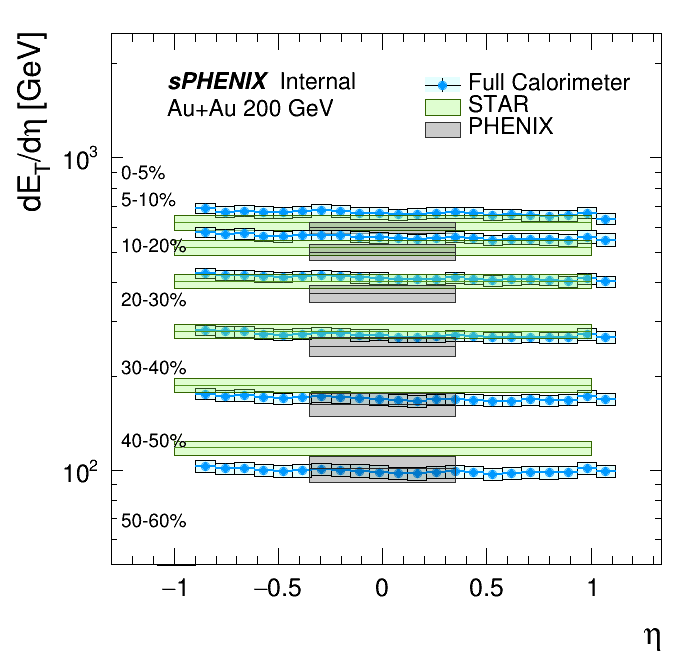

In [13]:
for i in range(len(calo_detdeta_hijing)):
    for j in range(1, 3):
        calo_detdeta_hijing[i].SetBinContent(j,-1)
        calo_detdeta_hijing[i].SetBinError(j,-1)
        calo_unc[i].SetBinContent(j,-1)
        calo_unc[i].SetBinError(j,-1)
        emcal_detdeta_hijing[i].SetBinContent(j,-1)
        emcal_detdeta_hijing[i].SetBinError(j,-1)
        emcal_unc[i].SetBinContent(j,-1)
        emcal_unc[i].SetBinError(j,-1)
        
emcal_hijing_errors = []
for j in range(len(emcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, emcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = emcal_unc[j].GetBinContent(i)
        x = emcal_detdeta_hijing[j].GetBinCenter(i)
        y = emcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = emcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    emcal_hijing_errors.append(graph)
    
ohcal_hijing_errors = []
for j in range(len(ohcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, ohcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = ohcal_unc[j].GetBinContent(i)
        x = ohcal_detdeta_hijing[j].GetBinCenter(i)
        y = ohcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = ohcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    ohcal_hijing_errors.append(graph)

calo_hijing_errors = []
for j in range(len(calo_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, calo_detdeta_hijing[j].GetNbinsX() + 1):
        error = calo_unc[j].GetBinContent(i)
        x = calo_detdeta_hijing[j].GetBinCenter(i)
        y = calo_detdeta_hijing[j].GetBinContent(i)
        bin_width = calo_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    calo_hijing_errors.append(graph)

colors = [ROOT.kPink-6, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kSpring-4] #, ROOT.kCyan, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
error_colors = [ROOT.kRed-10, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kSpring-4]
canvas = TCanvas("canvas", "", 700, 700)
leg = ROOT.TLegend(.6, .79, .89, .89)
leg.SetTextSize(0.038)

starline = []
starbox = []
phnxline = []
phnxbox = []

for i in range(len(calo_detdeta_hijing)):
    calo_detdeta_hijing[i].SetLineColor(colors[1])
    calo_detdeta_hijing[i].SetMarkerColor(colors[1])
    calo_hijing_errors[i].SetMarkerColor(colors[1])
    calo_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    emcal_detdeta_hijing[i].SetLineColor(colors[1])
    emcal_detdeta_hijing[i].SetMarkerColor(colors[1])
    emcal_hijing_errors[i].SetMarkerColor(colors[1])
    emcal_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    ohcal_detdeta_hijing[i].SetLineColor(colors[2])
    ohcal_detdeta_hijing[i].SetMarkerColor(colors[2])
    ohcal_hijing_errors[i].SetMarkerColor(colors[2])
    ohcal_hijing_errors[i].SetFillColorAlpha(error_colors[2], 0.5)
    
    starline.append(ROOT.TLine(-1,starmean[i],1,starmean[i]))
    phnxline.append(ROOT.TLine(-0.35,phenixmean[i],0.35,phenixmean[i]))
    starbox.append(ROOT.TBox(-1,starmean[i]-staruncert[i],1,starmean[i]+staruncert[i]))
    phnxbox.append(ROOT.TBox(-0.35,phenixmean[i]-phenixuncert[i],0.35,phenixmean[i]+phenixuncert[i]))
    phnxline[i].SetLineColor(ROOT.kGray+3)
    phnxbox[i].SetFillColorAlpha(ROOT.kBlack,0.2)
    phnxbox[i].SetLineColor(ROOT.kGray+3)
    phnxbox[i].SetLineWidth(1)
    starline[i].SetLineColor(ROOT.kSpring-7)
    starbox[i].SetFillColorAlpha(ROOT.kSpring-4,0.3)
    starbox[i].SetLineWidth(1)
    starbox[i].SetLineColor(ROOT.kSpring-7)
    
    if i == 0:
        #leg.AddEntry(emcal_hijing_errors[i],"EMCal","lpef")
        #leg.AddEntry(ohcal_hijing_errors[i],"OHCal","lpef")
        leg.AddEntry(calo_hijing_errors[i],"Full Calorimeter","lpef")
        calo_hijing_errors[i].GetYaxis().SetRangeUser(50, 2500)
        calo_hijing_errors[i].GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
        calo_hijing_errors[i].GetXaxis().SetTitle("#eta")
        calo_hijing_errors[i].GetYaxis().SetTitleSize(0.05)
        calo_hijing_errors[i].GetXaxis().SetLabelSize(0.04)
        calo_hijing_errors[i].GetYaxis().SetLabelSize(0.04)
        calo_hijing_errors[i].Draw("A5")
        #emcal_hijing_errors[i].Draw("5")
        #ohcal_hijing_errors[i].Draw("5")
        calo_detdeta_hijing[i].Draw("P same")
        #emcal_detdeta_hijing[i].Draw("P same")
        #ohcal_detdeta_hijing[i].Draw("P same")
        starline[i].Draw()
        starbox[i].Draw("l")
        phnxline[i].Draw()
        phnxbox[i].Draw("l")
        leg.AddEntry(starbox[i],"STAR","f")
        leg.AddEntry(phnxbox[i],"PHENIX","f")
        
    else:
        calo_hijing_errors[i].Draw("5 same")
        #emcal_hijing_errors[i].Draw("5 same")
        #ohcal_hijing_errors[i].Draw("5 same")
        calo_detdeta_hijing[i].Draw("P same")
        #emcal_detdeta_hijing[i].Draw("P same")
        #ohcal_detdeta_hijing[i].Draw("P same")
        starline[i].Draw()
        starbox[i].Draw("l")
        phnxline[i].Draw()
        phnxbox[i].Draw("l")

text = ROOT.TLatex()
text.SetTextSize(0.038)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.24, 0.88, "#it{#bf{sPHENIX}} Internal")

text2 = ROOT.TLatex()
text2.SetTextSize(0.038)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.24, 0.84, "Au+Au 200 GeV")

text3 = ROOT.TLatex()
text3.SetTextSize(0.03)
text3.SetTextAlign(12)  # Center alignment
text3.SetTextColor(ROOT.kBlack)
text3.DrawLatexNDC(0.175, 0.743, "0-5%")

text4 = ROOT.TLatex()
text4.SetTextSize(0.03)
text4.SetTextAlign(12)  # Center alignment
text4.SetTextColor(ROOT.kBlack)
text4.DrawLatexNDC(0.175, 0.703, "5-10%")

text5 = ROOT.TLatex()
text5.SetTextSize(0.03)
text5.SetTextAlign(12)  # Center alignment
text5.SetTextColor(ROOT.kBlack)
text5.DrawLatexNDC(0.175, 0.635, "10-20%")

text6 = ROOT.TLatex()
text6.SetTextSize(0.03)
text6.SetTextAlign(12)  # Center alignment
text6.SetTextColor(ROOT.kBlack)
text6.DrawLatexNDC(0.175, 0.555, "20-30%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.453, "30-40%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.345, "40-50%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.225, "50-60%")


leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
#canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/full_calorimeter_all_cent_with_star_phenix_log.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


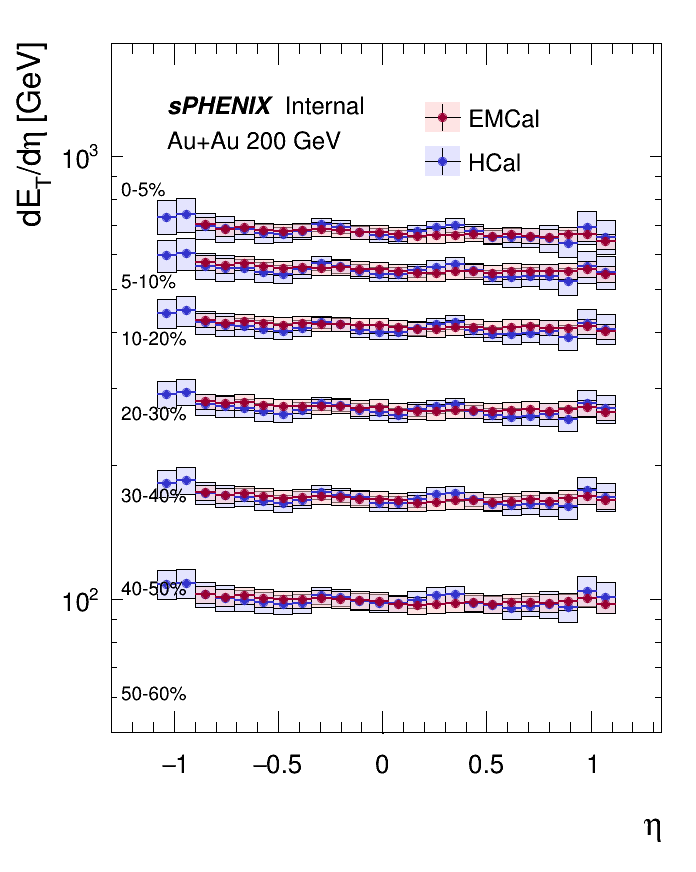

In [14]:
for i in range(len(calo_detdeta_hijing)):
    for j in range(1, 3):
        calo_detdeta_hijing[i].SetBinContent(j,-1)
        calo_detdeta_hijing[i].SetBinError(j,-1)
        calo_unc[i].SetBinContent(j,-1)
        calo_unc[i].SetBinError(j,-1)
        emcal_detdeta_hijing[i].SetBinContent(j,-1)
        emcal_detdeta_hijing[i].SetBinError(j,-1)
        emcal_unc[i].SetBinContent(j,-1)
        emcal_unc[i].SetBinError(j,-1)
        
emcal_hijing_errors = []
for j in range(len(emcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(3, emcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = emcal_unc[j].GetBinContent(i)
        x = emcal_detdeta_hijing[j].GetBinCenter(i)
        y = emcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = emcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    emcal_hijing_errors.append(graph)
    
ohcal_hijing_errors = []
for j in range(len(ohcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, ohcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = ohcal_unc[j].GetBinContent(i)
        x = ohcal_detdeta_hijing[j].GetBinCenter(i)
        y = ohcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = ohcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    ohcal_hijing_errors.append(graph)
    
hcal_hijing_errors = []
for j in range(len(hcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, hcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = hcal_unc[j].GetBinContent(i)
        x = hcal_detdeta_hijing[j].GetBinCenter(i)
        y = hcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = hcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    hcal_hijing_errors.append(graph)

calo_hijing_errors = []
for j in range(len(calo_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(3, calo_detdeta_hijing[j].GetNbinsX() + 1):
        error = calo_unc[j].GetBinContent(i)
        x = calo_detdeta_hijing[j].GetBinCenter(i)
        y = calo_detdeta_hijing[j].GetBinContent(i)
        bin_width = calo_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    calo_hijing_errors.append(graph)

colors = [ROOT.kPink-6, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kSpring-4] #, ROOT.kCyan, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
error_colors = [ROOT.kRed-10, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kSpring-4]
canvas = TCanvas("canvas", "", 700, 900)
leg = ROOT.TLegend(.6, .79, .89, .89)
leg.SetTextSize(0.038)

for i in range(len(calo_detdeta_hijing)):
    ohcal_detdeta_hijing[i].SetLineColor(colors[0])
    ohcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    ohcal_hijing_errors[i].SetMarkerColor(colors[0])
    ohcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    emcal_detdeta_hijing[i].SetLineColor(colors[0])
    emcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    hcal_detdeta_hijing[i].SetLineColor(colors[2])
    hcal_detdeta_hijing[i].SetMarkerColor(colors[2])
    hcal_hijing_errors[i].SetMarkerColor(colors[2])
    hcal_hijing_errors[i].SetFillColorAlpha(error_colors[2], 0.5)
    if i == 0:
        leg.AddEntry(emcal_hijing_errors[i],"EMCal","lpef")
        leg.AddEntry(hcal_hijing_errors[i],"HCal","lpef")
        #leg.AddEntry(ohcal_hijing_errors[i],"OHCal","lpef")
        hcal_hijing_errors[i].GetYaxis().SetRangeUser(50, 1800)
        hcal_hijing_errors[i].GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
        hcal_hijing_errors[i].GetXaxis().SetTitle("#eta")
        hcal_hijing_errors[i].GetYaxis().SetTitleSize(0.05)
        hcal_hijing_errors[i].GetXaxis().SetLabelSize(0.04)
        hcal_hijing_errors[i].GetYaxis().SetLabelSize(0.04)
        hcal_hijing_errors[i].Draw("A5")
        emcal_hijing_errors[i].Draw("5")
        #ohcal_hijing_errors[i].Draw("5")
        hcal_detdeta_hijing[i].Draw("P same")
        emcal_detdeta_hijing[i].Draw("P same")
        #ohcal_detdeta_hijing[i].Draw("P same")
        
    else:
        hcal_hijing_errors[i].Draw("5 same")
        emcal_hijing_errors[i].Draw("5 same")
        #ohcal_hijing_errors[i].Draw("5 same")
        hcal_detdeta_hijing[i].Draw("P same")
        emcal_detdeta_hijing[i].Draw("P same")
        #ohcal_detdeta_hijing[i].Draw("P same")


text = ROOT.TLatex()
text.SetTextSize(0.038)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.24, 0.88, "#it{#bf{sPHENIX}} Internal")

text2 = ROOT.TLatex()
text2.SetTextSize(0.038)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.24, 0.84, "Au+Au 200 GeV")

text3 = ROOT.TLatex()
text3.SetTextSize(0.03)
text3.SetTextAlign(12)  # Center alignment
text3.SetTextColor(ROOT.kBlack)
text3.DrawLatexNDC(0.175, 0.783, "0-5%")

text4 = ROOT.TLatex()
text4.SetTextSize(0.03)
text4.SetTextAlign(12)  # Center alignment
text4.SetTextColor(ROOT.kBlack)
text4.DrawLatexNDC(0.175, 0.677, "5-10%")

text5 = ROOT.TLatex()
text5.SetTextSize(0.03)
text5.SetTextAlign(12)  # Center alignment
text5.SetTextColor(ROOT.kBlack)
text5.DrawLatexNDC(0.175, 0.612, "10-20%")

text6 = ROOT.TLatex()
text6.SetTextSize(0.03)
text6.SetTextAlign(12)  # Center alignment
text6.SetTextColor(ROOT.kBlack)
text6.DrawLatexNDC(0.175, 0.526, "20-30%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.432, "30-40%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.325, "40-50%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.205, "50-60%")

leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
#canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_hcal_all_cent_log.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_hcal_full_calo_all_cent_log_separate.png has been created


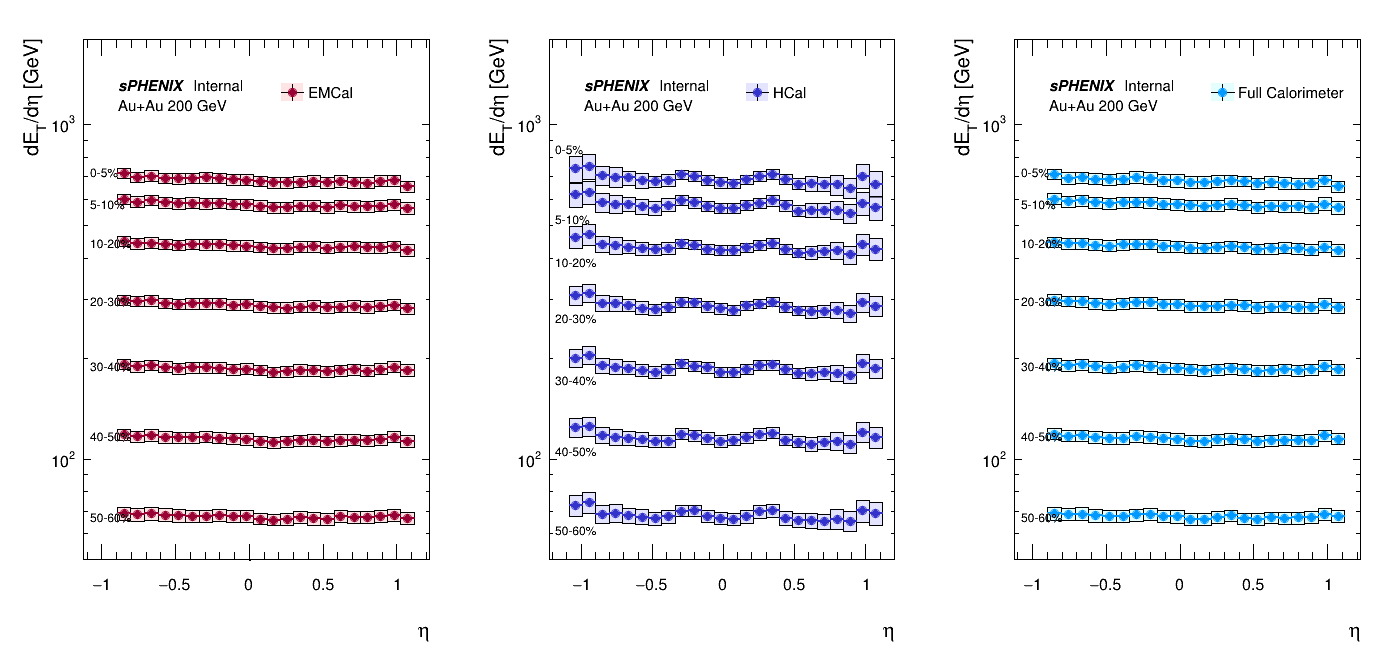

In [66]:
for i in range(len(calo_detdeta_hijing)):
    for j in range(1, 3):
        calo_detdeta_hijing[i].SetBinContent(j,-1)
        calo_detdeta_hijing[i].SetBinError(j,-1)
        calo_unc[i].SetBinContent(j,-1)
        calo_unc[i].SetBinError(j,-1)
        emcal_detdeta_hijing[i].SetBinContent(j,-1)
        emcal_detdeta_hijing[i].SetBinError(j,-1)
        emcal_unc[i].SetBinContent(j,-1)
        emcal_unc[i].SetBinError(j,-1)
        
emcal_hijing_errors = []
for j in range(len(emcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(3, emcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = emcal_unc[j].GetBinContent(i)
        x = emcal_detdeta_hijing[j].GetBinCenter(i)
        y = emcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = emcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    emcal_hijing_errors.append(graph)
    
ohcal_hijing_errors = []
for j in range(len(ohcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, ohcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = ohcal_unc[j].GetBinContent(i)
        x = ohcal_detdeta_hijing[j].GetBinCenter(i)
        y = ohcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = ohcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    ohcal_hijing_errors.append(graph)
    
hcal_hijing_errors = []
for j in range(len(hcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, hcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = hcal_unc[j].GetBinContent(i)
        x = hcal_detdeta_hijing[j].GetBinCenter(i)
        y = hcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = hcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    hcal_hijing_errors.append(graph)

calo_hijing_errors = []
for j in range(len(calo_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(3, calo_detdeta_hijing[j].GetNbinsX() + 1):
        error = calo_unc[j].GetBinContent(i)
        x = calo_detdeta_hijing[j].GetBinCenter(i)
        y = calo_detdeta_hijing[j].GetBinContent(i)
        bin_width = calo_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    calo_hijing_errors.append(graph)

import ROOT

colors = [ROOT.kPink-6, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kSpring-4] # Define colors for the histograms
error_colors = [ROOT.kRed-10, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kSpring-4] # Define colors for the errors

# Create the main canvas
canvas = ROOT.TCanvas("canvas", "", 1400, 700)
canvas.Divide(3, 1)  # Divide the canvas into 3 pads

# Create legends for each pad
leg1 = ROOT.TLegend(.6, .85, .89, .89)
leg1.SetTextSize(0.038)
leg2 = ROOT.TLegend(.6, .85, .89, .89)
leg2.SetTextSize(0.038)
leg3 = ROOT.TLegend(.6, .85, .89, .89)
leg3.SetTextSize(0.038)

for i in range(len(calo_detdeta_hijing)):
    # Setting line and marker colors for EMCal, OHCal, and Full Calorimeter histograms
    calo_detdeta_hijing[i].SetLineColor(colors[1])
    calo_detdeta_hijing[i].SetMarkerColor(colors[1])
    calo_hijing_errors[i].SetMarkerColor(colors[1])
    calo_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    emcal_detdeta_hijing[i].SetLineColor(colors[0])
    emcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    hcal_detdeta_hijing[i].SetLineColor(colors[2])
    hcal_detdeta_hijing[i].SetMarkerColor(colors[2])
    hcal_hijing_errors[i].SetMarkerColor(colors[2])
    hcal_hijing_errors[i].SetFillColorAlpha(error_colors[2], 0.5)
    
    if i == 0:
        # Add entries to the legends
        leg1.AddEntry(emcal_hijing_errors[i], "EMCal", "lpef")
        leg2.AddEntry(hcal_hijing_errors[i], "HCal", "lpef")
        leg3.AddEntry(calo_hijing_errors[i], "Full Calorimeter", "lpef")
        
        # Configure axis titles and labels
        for hist in [emcal_hijing_errors[i], hcal_hijing_errors[i], calo_hijing_errors[i]]:
            hist.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
            hist.GetXaxis().SetTitle("#eta")
            hist.GetYaxis().SetTitleSize(0.05)
            hist.GetXaxis().SetLabelSize(0.04)
            hist.GetYaxis().SetLabelSize(0.04)
            hist.GetYaxis().SetRangeUser(50, 1800)
            hist.GetXaxis().SetRangeUser(-1.2, 1.2)

    # Draw histograms on the respective pads
    canvas.cd(1)
    if i == 0:
        emcal_hijing_errors[i].Draw("A5")
        emcal_detdeta_hijing[i].Draw("P same")
    else:
        emcal_hijing_errors[i].Draw("5 same")
        emcal_detdeta_hijing[i].Draw("P same")
        
    canvas.cd(2)
    if i == 0:
        hcal_hijing_errors[i].Draw("A5")
        hcal_detdeta_hijing[i].Draw("P same")
    else:
        hcal_hijing_errors[i].Draw("5 same")
        hcal_detdeta_hijing[i].Draw("P same")
        
    canvas.cd(3)
    if i == 0:
        calo_hijing_errors[i].Draw("A5")
        calo_detdeta_hijing[i].Draw("P same")
    else:
        calo_hijing_errors[i].Draw("5 same")
        calo_detdeta_hijing[i].Draw("P same")

# Draw legends
canvas.cd(1)
leg1.Draw()
text = ROOT.TLatex()
text.SetTextSize(0.038)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.24, 0.88, "#it{#bf{sPHENIX}} Internal")

text2 = ROOT.TLatex()
text2.SetTextSize(0.038)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.24, 0.85, "Au+Au 200 GeV")

text3 = ROOT.TLatex()
text3.SetTextSize(0.03)
text3.SetTextAlign(12)  # Center alignment
text3.SetTextColor(ROOT.kBlack)
text3.DrawLatexNDC(0.175, 0.748, "0-5%")

text4 = ROOT.TLatex()
text4.SetTextSize(0.03)
text4.SetTextAlign(12)  # Center alignment
text4.SetTextColor(ROOT.kBlack)
text4.DrawLatexNDC(0.175, 0.70, "5-10%")

text5 = ROOT.TLatex()
text5.SetTextSize(0.03)
text5.SetTextAlign(12)  # Center alignment
text5.SetTextColor(ROOT.kBlack)
text5.DrawLatexNDC(0.175, 0.64, "10-20%")

text6 = ROOT.TLatex()
text6.SetTextSize(0.03)
text6.SetTextAlign(12)  # Center alignment
text6.SetTextColor(ROOT.kBlack)
text6.DrawLatexNDC(0.175, 0.552, "20-30%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.454, "30-40%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.347, "40-50%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.225, "50-60%")
canvas.cd(2)
leg2.Draw()
te = ROOT.TLatex()
te.SetTextSize(0.038)
te.SetTextAlign(12)  # Center alignment
te.SetTextColor(ROOT.kBlack)
te.DrawLatexNDC(0.24, 0.88, "#it{#bf{sPHENIX}} Internal")

te2 = ROOT.TLatex()
te2.SetTextSize(0.038)
te2.SetTextAlign(12)  # Center alignment
te2.SetTextColor(ROOT.kBlack)
te2.DrawLatexNDC(0.24, 0.85, "Au+Au 200 GeV")

te3 = ROOT.TLatex()
te3.SetTextSize(0.03)
te3.SetTextAlign(12)  # Center alignment
te3.SetTextColor(ROOT.kBlack)
te3.DrawLatexNDC(0.175, 0.783, "0-5%")

te4 = ROOT.TLatex()
te4.SetTextSize(0.03)
te4.SetTextAlign(12)  # Center alignment
te4.SetTextColor(ROOT.kBlack)
te4.DrawLatexNDC(0.175, 0.677, "5-10%")

te5 = ROOT.TLatex()
te5.SetTextSize(0.03)
te5.SetTextAlign(12)  # Center alignment
te5.SetTextColor(ROOT.kBlack)
te5.DrawLatexNDC(0.175, 0.612, "10-20%")

te6 = ROOT.TLatex()
te6.SetTextSize(0.03)
te6.SetTextAlign(12)  # Center alignment
te6.SetTextColor(ROOT.kBlack)
te6.DrawLatexNDC(0.175, 0.526, "20-30%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.432, "30-40%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.325, "40-50%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.205, "50-60%")
canvas.cd(3)
leg3.Draw()
tex = ROOT.TLatex()
tex.SetTextSize(0.038)
tex.SetTextAlign(12)  # Center alignment
tex.SetTextColor(ROOT.kBlack)
tex.DrawLatexNDC(0.24, 0.88, "#it{#bf{sPHENIX}} Internal")

tex2 = ROOT.TLatex()
tex2.SetTextSize(0.038)
tex2.SetTextAlign(12)  # Center alignment
tex2.SetTextColor(ROOT.kBlack)
tex2.DrawLatexNDC(0.24, 0.85, "Au+Au 200 GeV")

tex3 = ROOT.TLatex()
tex3.SetTextSize(0.03)
tex3.SetTextAlign(12)  # Center alignment
tex3.SetTextColor(ROOT.kBlack)
tex3.DrawLatexNDC(0.175, 0.748, "0-5%")

tex4 = ROOT.TLatex()
tex4.SetTextSize(0.03)
tex4.SetTextAlign(12)  # Center alignment
tex4.SetTextColor(ROOT.kBlack)
tex4.DrawLatexNDC(0.175, 0.70, "5-10%")

tex5 = ROOT.TLatex()
tex5.SetTextSize(0.03)
tex5.SetTextAlign(12)  # Center alignment
tex5.SetTextColor(ROOT.kBlack)
tex5.DrawLatexNDC(0.175, 0.64, "10-20%")

tex6 = ROOT.TLatex()
tex6.SetTextSize(0.03)
tex6.SetTextAlign(12)  # Center alignment
tex6.SetTextColor(ROOT.kBlack)
tex6.DrawLatexNDC(0.175, 0.552, "20-30%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.454, "30-40%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
tex7.DrawLatexNDC(0.175, 0.347, "40-50%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
tex7.DrawLatexNDC(0.175, 0.225, "50-60%")

# Set logarithmic scale
for i in range(1, 4):
    canvas.cd(i).SetLogy(1)

# Update the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_hcal_full_calo_all_cent_log_separate.png")

7 7 7


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/flipped_emcal_hcal_full_calo_all_cent_log_separate.png has been created


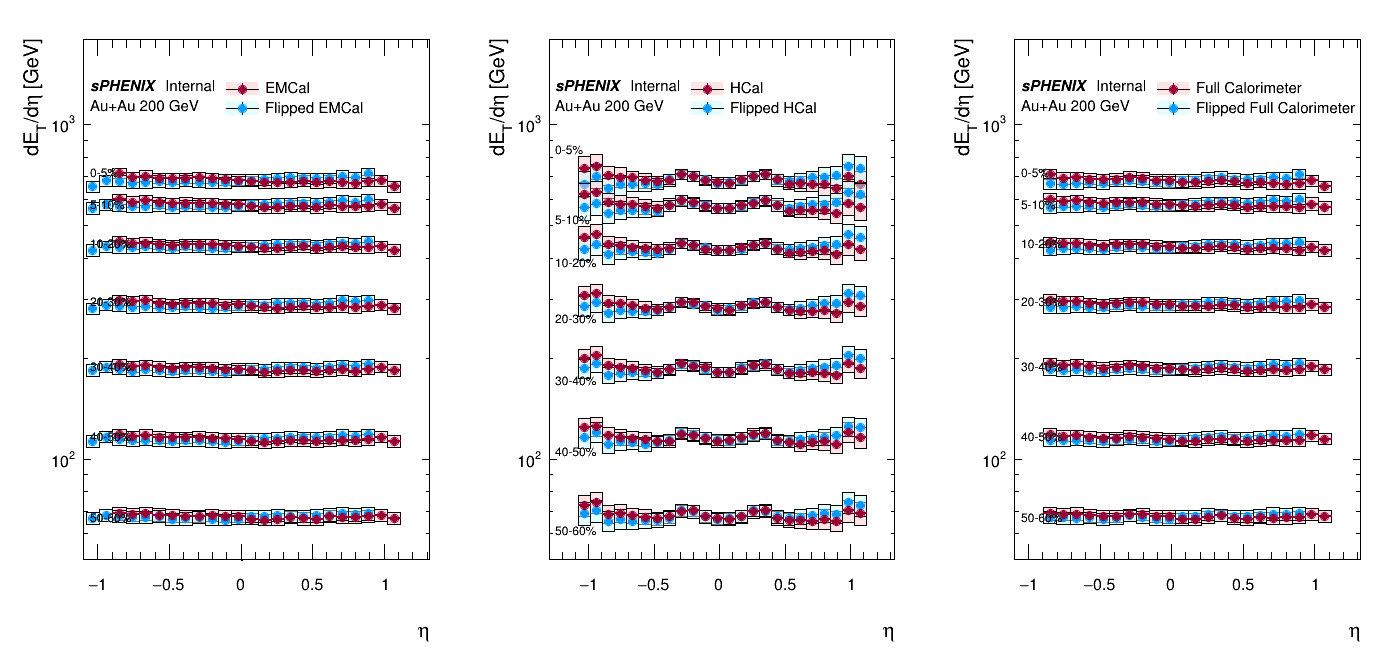

In [69]:
flip_emcal_hijing_errors = []
flip_ohcal_hijing_errors = []
flip_calo_hijing_errors = []
flip_hcal_hijing_errors = []

for i in range(len(calo_detdeta_hijing)):
    for j in range(1, 3):
        calo_detdeta_hijing[i].SetBinContent(j,-1)
        calo_detdeta_hijing[i].SetBinError(j,-1)
        calo_unc[i].SetBinContent(j,-1)
        calo_unc[i].SetBinError(j,-1)
        emcal_detdeta_hijing[i].SetBinContent(j,-1)
        emcal_detdeta_hijing[i].SetBinError(j,-1)
        emcal_unc[i].SetBinContent(j,-1)
        emcal_unc[i].SetBinError(j,-1)

for j in range(len(emcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, emcal_detdeta_hijing[j].GetNbinsX() - 1):
        error = emcal_unc[j].GetBinContent(25-i)
        x = emcal_detdeta_hijing[j].GetBinCenter(i)
        y = emcal_detdeta_hijing[j].GetBinContent(25-i)
        bin_width = emcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_emcal_hijing_errors.append(graph)
    
for j in range(len(ohcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, ohcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = ohcal_unc[j].GetBinContent(25-i)
        x = ohcal_detdeta_hijing[j].GetBinCenter(i)
        y = ohcal_detdeta_hijing[j].GetBinContent(25-i)
        bin_width = ohcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_ohcal_hijing_errors.append(graph)

for j in range(len(hcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, hcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = hcal_unc[j].GetBinContent(25-i)
        x = hcal_detdeta_hijing[j].GetBinCenter(i)
        y = hcal_detdeta_hijing[j].GetBinContent(25-i)
        bin_width = hcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_hcal_hijing_errors.append(graph)

for j in range(len(calo_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(3, calo_detdeta_hijing[j].GetNbinsX() - 1):
        error = calo_unc[j].GetBinContent(25-i)
        x = calo_detdeta_hijing[j].GetBinCenter(i)
        y = calo_detdeta_hijing[j].GetBinContent(25-i)
        bin_width = calo_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_calo_hijing_errors.append(graph)
print(len(flip_emcal_hijing_errors), len(flip_hcal_hijing_errors), len(flip_calo_hijing_errors))
colors = [ROOT.kPink-6, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kSpring-4] # Define colors for the histograms
error_colors = [ROOT.kRed-10, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kSpring-4] # Define colors for the errors

# Create the main canvas
canvas = ROOT.TCanvas("canvas", "", 1400, 700)
canvas.Divide(3, 1)  # Divide the canvas into 3 pads

# Create legends for each pad
leg1 = ROOT.TLegend(.47, .83, .89, .89)
leg1.SetTextSize(0.038)
leg2 = ROOT.TLegend(.47, .83, .89, .89)
leg2.SetTextSize(0.038)
leg3 = ROOT.TLegend(.47, .83, .89, .89)
leg3.SetTextSize(0.038)

for i in range(len(calo_detdeta_hijing)):
    # Setting line and marker colors for EMCal, OHCal, and Full Calorimeter histograms
    calo_detdeta_hijing[i].SetLineColor(colors[0])
    calo_detdeta_hijing[i].SetMarkerColor(colors[0])
    calo_hijing_errors[i].SetMarkerColor(colors[0])
    calo_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    flip_calo_hijing_errors[i].SetMarkerColor(colors[1])
    flip_calo_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    emcal_detdeta_hijing[i].SetLineColor(colors[0])
    emcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    flip_emcal_hijing_errors[i].SetMarkerColor(colors[1])
    flip_emcal_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    hcal_detdeta_hijing[i].SetLineColor(colors[0])
    hcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    hcal_hijing_errors[i].SetMarkerColor(colors[0])
    hcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    flip_hcal_hijing_errors[i].SetMarkerColor(colors[1])
    flip_hcal_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    if i == 0:
        # Add entries to the legends
        leg1.AddEntry(emcal_hijing_errors[i], "EMCal", "lpef")
        leg2.AddEntry(hcal_hijing_errors[i], "HCal", "lpef")
        leg3.AddEntry(calo_hijing_errors[i], "Full Calorimeter", "lpef")
        leg1.AddEntry(flip_emcal_hijing_errors[i], "Flipped EMCal", "lpef")
        leg2.AddEntry(flip_hcal_hijing_errors[i], "Flipped HCal", "lpef")
        leg3.AddEntry(flip_calo_hijing_errors[i], "Flipped Full Calorimeter", "lpef")
        
        # Configure axis titles and labels
        for hist in [emcal_hijing_errors[i], hcal_hijing_errors[i], calo_hijing_errors[i]]:
            hist.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
            hist.GetXaxis().SetTitle("#eta")
            hist.GetYaxis().SetTitleSize(0.05)
            hist.GetXaxis().SetLabelSize(0.04)
            hist.GetYaxis().SetLabelSize(0.04)
            hist.GetYaxis().SetRangeUser(50, 1800)

    # Draw histograms on the respective pads
    canvas.cd(1)
    if i == 0:
        emcal_hijing_errors[i].Draw("A5")
        flip_emcal_hijing_errors[i].Draw("5P same")
        emcal_detdeta_hijing[i].Draw("P same")
    else:
        emcal_hijing_errors[i].Draw("5 same")
        flip_emcal_hijing_errors[i].Draw("5P same")
        emcal_detdeta_hijing[i].Draw("P same")
        
    canvas.cd(2)
    if i == 0:
        hcal_hijing_errors[i].Draw("A5")
        flip_hcal_hijing_errors[i].Draw("5P same")
        hcal_detdeta_hijing[i].Draw("P same")
    else:
        hcal_hijing_errors[i].Draw("5 same")
        flip_hcal_hijing_errors[i].Draw("5P same")
        hcal_detdeta_hijing[i].Draw("P same")
        
    canvas.cd(3)
    if i == 0:
        calo_hijing_errors[i].Draw("A5")
        flip_calo_hijing_errors[i].Draw("5P same")
        calo_detdeta_hijing[i].Draw("P same")
    else:
        calo_hijing_errors[i].Draw("5 same")
        flip_calo_hijing_errors[i].Draw("5P same")
        calo_detdeta_hijing[i].Draw("P same")

# Draw legends
canvas.cd(1)
leg1.Draw()
text = ROOT.TLatex()
text.SetTextSize(0.038)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.175, 0.88, "#it{#bf{sPHENIX}} Internal")

text2 = ROOT.TLatex()
text2.SetTextSize(0.038)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.175, 0.85, "Au+Au 200 GeV")

text3 = ROOT.TLatex()
text3.SetTextSize(0.03)
text3.SetTextAlign(12)  # Center alignment
text3.SetTextColor(ROOT.kBlack)
text3.DrawLatexNDC(0.175, 0.748, "0-5%")

text4 = ROOT.TLatex()
text4.SetTextSize(0.03)
text4.SetTextAlign(12)  # Center alignment
text4.SetTextColor(ROOT.kBlack)
text4.DrawLatexNDC(0.175, 0.70, "5-10%")

text5 = ROOT.TLatex()
text5.SetTextSize(0.03)
text5.SetTextAlign(12)  # Center alignment
text5.SetTextColor(ROOT.kBlack)
text5.DrawLatexNDC(0.175, 0.64, "10-20%")

text6 = ROOT.TLatex()
text6.SetTextSize(0.03)
text6.SetTextAlign(12)  # Center alignment
text6.SetTextColor(ROOT.kBlack)
text6.DrawLatexNDC(0.175, 0.552, "20-30%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.454, "30-40%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.347, "40-50%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.225, "50-60%")
canvas.cd(2)
leg2.Draw()
te = ROOT.TLatex()
te.SetTextSize(0.038)
te.SetTextAlign(12)  # Center alignment
te.SetTextColor(ROOT.kBlack)
te.DrawLatexNDC(0.175, 0.88, "#it{#bf{sPHENIX}} Internal")

te2 = ROOT.TLatex()
te2.SetTextSize(0.038)
te2.SetTextAlign(12)  # Center alignment
te2.SetTextColor(ROOT.kBlack)
te2.DrawLatexNDC(0.175, 0.85, "Au+Au 200 GeV")

te3 = ROOT.TLatex()
te3.SetTextSize(0.03)
te3.SetTextAlign(12)  # Center alignment
te3.SetTextColor(ROOT.kBlack)
te3.DrawLatexNDC(0.175, 0.783, "0-5%")

te4 = ROOT.TLatex()
te4.SetTextSize(0.03)
te4.SetTextAlign(12)  # Center alignment
te4.SetTextColor(ROOT.kBlack)
te4.DrawLatexNDC(0.175, 0.677, "5-10%")

te5 = ROOT.TLatex()
te5.SetTextSize(0.03)
te5.SetTextAlign(12)  # Center alignment
te5.SetTextColor(ROOT.kBlack)
te5.DrawLatexNDC(0.175, 0.612, "10-20%")

te6 = ROOT.TLatex()
te6.SetTextSize(0.03)
te6.SetTextAlign(12)  # Center alignment
te6.SetTextColor(ROOT.kBlack)
te6.DrawLatexNDC(0.175, 0.526, "20-30%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.432, "30-40%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.325, "40-50%")

te7 = ROOT.TLatex()
te7.SetTextSize(0.03)
te7.SetTextAlign(12)  # Center alignment
te7.SetTextColor(ROOT.kBlack)
te7.DrawLatexNDC(0.175, 0.205, "50-60%")
canvas.cd(3)
leg3.Draw()
tex = ROOT.TLatex()
tex.SetTextSize(0.038)
tex.SetTextAlign(12)  # Center alignment
tex.SetTextColor(ROOT.kBlack)
tex.DrawLatexNDC(0.175, 0.88, "#it{#bf{sPHENIX}} Internal")

tex2 = ROOT.TLatex()
tex2.SetTextSize(0.038)
tex2.SetTextAlign(12)  # Center alignment
tex2.SetTextColor(ROOT.kBlack)
tex2.DrawLatexNDC(0.175, 0.85, "Au+Au 200 GeV")

tex3 = ROOT.TLatex()
tex3.SetTextSize(0.03)
tex3.SetTextAlign(12)  # Center alignment
tex3.SetTextColor(ROOT.kBlack)
tex3.DrawLatexNDC(0.175, 0.748, "0-5%")

tex4 = ROOT.TLatex()
tex4.SetTextSize(0.03)
tex4.SetTextAlign(12)  # Center alignment
tex4.SetTextColor(ROOT.kBlack)
tex4.DrawLatexNDC(0.175, 0.70, "5-10%")

tex5 = ROOT.TLatex()
tex5.SetTextSize(0.03)
tex5.SetTextAlign(12)  # Center alignment
tex5.SetTextColor(ROOT.kBlack)
tex5.DrawLatexNDC(0.175, 0.64, "10-20%")

tex6 = ROOT.TLatex()
tex6.SetTextSize(0.03)
tex6.SetTextAlign(12)  # Center alignment
tex6.SetTextColor(ROOT.kBlack)
tex6.DrawLatexNDC(0.175, 0.552, "20-30%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.454, "30-40%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
tex7.DrawLatexNDC(0.175, 0.347, "40-50%")

tex7 = ROOT.TLatex()
tex7.SetTextSize(0.03)
tex7.SetTextAlign(12)  # Center alignment
tex7.SetTextColor(ROOT.kBlack)
tex7.DrawLatexNDC(0.175, 0.225, "50-60%")

# Set logarithmic scale
for i in range(1, 4):
    canvas.cd(i).SetLogy(1)

# Update the canvas
canvas.Update()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/flipped_emcal_hcal_full_calo_all_cent_log_separate.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_hcal_all_cent_log.png has been created


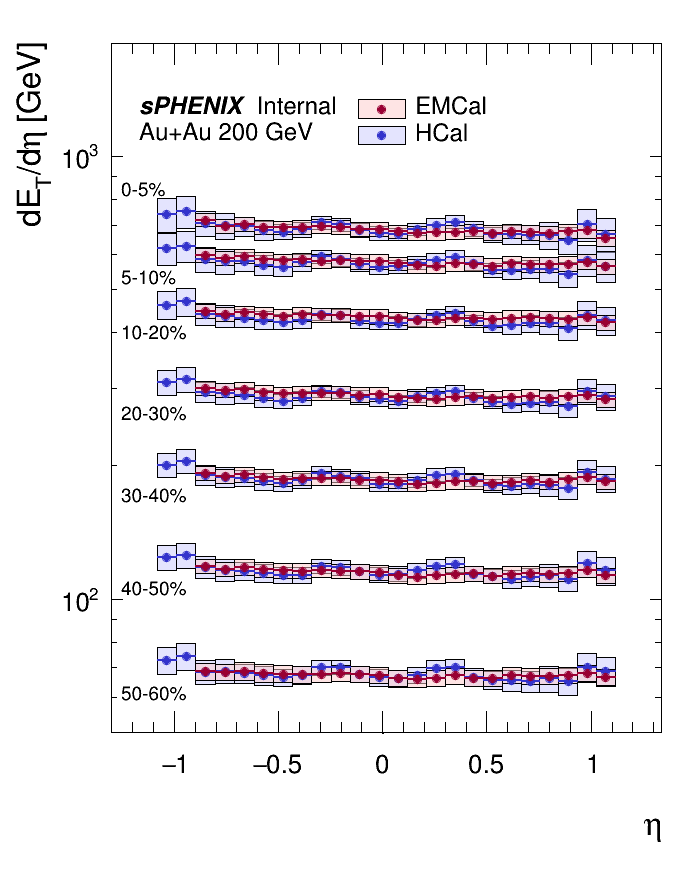

In [103]:
for i in range(len(calo_detdeta_hijing)):
    for j in range(1, 3):
        calo_detdeta_hijing[i].SetBinContent(j,-1)
        calo_detdeta_hijing[i].SetBinError(j,-1)
        calo_unc[i].SetBinContent(j,-1)
        calo_unc[i].SetBinError(j,-1)
        emcal_detdeta_hijing[i].SetBinContent(j,-1)
        emcal_detdeta_hijing[i].SetBinError(j,-1)
        emcal_unc[i].SetBinContent(j,-1)
        emcal_unc[i].SetBinError(j,-1)
        
emcal_hijing_errors = []
for j in range(len(emcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(3, emcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = emcal_unc[j].GetBinContent(i)
        x = emcal_detdeta_hijing[j].GetBinCenter(i)
        y = emcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = emcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    emcal_hijing_errors.append(graph)
    
ohcal_hijing_errors = []
for j in range(len(ohcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, ohcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = ohcal_unc[j].GetBinContent(i)
        x = ohcal_detdeta_hijing[j].GetBinCenter(i)
        y = ohcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = ohcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    ohcal_hijing_errors.append(graph)
    
hcal_hijing_errors = []
for j in range(len(hcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, hcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = hcal_unc[j].GetBinContent(i)
        x = hcal_detdeta_hijing[j].GetBinCenter(i)
        y = hcal_detdeta_hijing[j].GetBinContent(i)
        bin_width = hcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    hcal_hijing_errors.append(graph)

calo_hijing_errors = []
for j in range(len(calo_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(3, calo_detdeta_hijing[j].GetNbinsX() + 1):
        error = calo_unc[j].GetBinContent(i)
        x = calo_detdeta_hijing[j].GetBinCenter(i)
        y = calo_detdeta_hijing[j].GetBinContent(i)
        bin_width = calo_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    calo_hijing_errors.append(graph)
    
    
flip_emcal_hijing_errors = []
flip_ohcal_hijing_errors = []
flip_calo_hijing_errors = []
flip_hcal_hijing_errors = []

for j in range(len(emcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, emcal_detdeta_hijing[j].GetNbinsX() - 1):
        error = emcal_unc[j].GetBinContent(25-i)
        x = emcal_detdeta_hijing[j].GetBinCenter(i)
        y = emcal_detdeta_hijing[j].GetBinContent(25-i)
        bin_width = emcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_emcal_hijing_errors.append(graph)
    
for j in range(len(ohcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, ohcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = ohcal_unc[j].GetBinContent(25-i)
        x = ohcal_detdeta_hijing[j].GetBinCenter(i)
        y = ohcal_detdeta_hijing[j].GetBinContent(25-i)
        bin_width = ohcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_ohcal_hijing_errors.append(graph)

for j in range(len(hcal_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(1, hcal_detdeta_hijing[j].GetNbinsX() + 1):
        error = hcal_unc[j].GetBinContent(25-i)
        x = hcal_detdeta_hijing[j].GetBinCenter(i)
        y = hcal_detdeta_hijing[j].GetBinContent(25-i)
        bin_width = hcal_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_hcal_hijing_errors.append(graph)

for j in range(len(calo_detdeta_hijing)):
    graph = ROOT.TGraphErrors()
    for i in range(3, calo_detdeta_hijing[j].GetNbinsX() - 1):
        error = calo_unc[j].GetBinContent(25-i)
        x = calo_detdeta_hijing[j].GetBinCenter(i)
        y = calo_detdeta_hijing[j].GetBinContent(25-i)
        bin_width = calo_detdeta_hijing[j].GetBinWidth(i)
        graph.SetPoint(i - 1, x, y)
        graph.SetPointError(i - 1, bin_width / 2, error)
    flip_calo_hijing_errors.append(graph)

colors = [ROOT.kPink-6, ROOT.kAzure+7, ROOT.kBlue-3, ROOT.kSpring-4] #, ROOT.kCyan, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
error_colors = [ROOT.kRed-10, ROOT.kCyan-10, ROOT.kBlue-10, ROOT.kSpring-4]
canvas = TCanvas("canvas", "", 700, 900)
leg = ROOT.TLegend(.5, .83, .89, .89)
leg.SetTextSize(0.038)

starline = []
starbox = []
phnxline = []
phnxbox = []

for i in range(len(calo_detdeta_hijing)):
    
    # nominal histograms
    ohcal_detdeta_hijing[i].SetLineColor(colors[0])
    ohcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    ohcal_hijing_errors[i].SetMarkerColor(colors[0])
    ohcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    calo_detdeta_hijing[i].SetLineColor(colors[1])
    calo_detdeta_hijing[i].SetMarkerColor(colors[1])
    calo_hijing_errors[i].SetMarkerColor(colors[1])
    calo_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    emcal_detdeta_hijing[i].SetLineColor(colors[0])
    emcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    hcal_detdeta_hijing[i].SetLineColor(colors[2])
    hcal_detdeta_hijing[i].SetMarkerColor(colors[2])
    hcal_hijing_errors[i].SetMarkerColor(colors[2])
    hcal_hijing_errors[i].SetFillColorAlpha(error_colors[2], 0.5)
    
    # include star/phenix histograms
    starline.append(ROOT.TLine(-1,starmean[i],1,starmean[i]))
    phnxline.append(ROOT.TLine(-0.35,phenixmean[i],0.35,phenixmean[i]))
    starbox.append(ROOT.TBox(-1,starmean[i]-staruncert[i],1,starmean[i]+staruncert[i]))
    phnxbox.append(ROOT.TBox(-0.35,phenixmean[i]-phenixuncert[i],0.35,phenixmean[i]+phenixuncert[i]))
    phnxline[i].SetLineColor(ROOT.kGray+3)
    phnxbox[i].SetFillColorAlpha(ROOT.kBlack,0.2)
    phnxbox[i].SetLineColor(ROOT.kGray+3)
    phnxbox[i].SetLineWidth(1)
    starline[i].SetLineColor(ROOT.kSpring-7)
    starbox[i].SetFillColorAlpha(ROOT.kSpring-4,0.3)
    starbox[i].SetLineWidth(1)
    starbox[i].SetLineColor(ROOT.kSpring-7)
    
    # flipped histograms 
    calo_detdeta_hijing[i].SetLineColor(colors[0])
    calo_detdeta_hijing[i].SetMarkerColor(colors[0])
    calo_hijing_errors[i].SetMarkerColor(colors[0])
    calo_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    flip_calo_hijing_errors[i].SetMarkerColor(colors[1])
    flip_calo_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    emcal_detdeta_hijing[i].SetLineColor(colors[0])
    emcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetMarkerColor(colors[0])
    emcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    flip_emcal_hijing_errors[i].SetMarkerColor(colors[1])
    flip_emcal_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    hcal_detdeta_hijing[i].SetLineColor(colors[0])
    hcal_detdeta_hijing[i].SetMarkerColor(colors[0])
    hcal_hijing_errors[i].SetMarkerColor(colors[0])
    hcal_hijing_errors[i].SetFillColorAlpha(error_colors[0], 0.5)
    
    flip_hcal_hijing_errors[i].SetMarkerColor(colors[1])
    flip_hcal_hijing_errors[i].SetFillColorAlpha(error_colors[1], 0.5)
    
    if i == 0:
        leg.AddEntry(emcal_hijing_errors[i],"EMCal","pef")
        leg.AddEntry(hcal_hijing_errors[i],"HCal","pef")
        #leg.AddEntry(ohcal_hijing_errors[i],"OHCal","pef")
        #leg.AddEntry(calo_hijing_errors[i],"Full Calorimeter","pef")
        hcal_hijing_errors[i].GetYaxis().SetRangeUser(50, 1800)
        hcal_hijing_errors[i].GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
        hcal_hijing_errors[i].GetXaxis().SetTitle("#eta")
        hcal_hijing_errors[i].GetYaxis().SetTitleSize(0.05)
        hcal_hijing_errors[i].GetXaxis().SetLabelSize(0.04)
        hcal_hijing_errors[i].GetYaxis().SetLabelSize(0.04)
        #emcal_hijing_errors[i].GetYaxis().SetRangeUser(50, 1800)
        #emcal_hijing_errors[i].GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
        #emcal_hijing_errors[i].GetXaxis().SetTitle("#eta")
        #emcal_hijing_errors[i].GetYaxis().SetTitleSize(0.05)
        #emcal_hijing_errors[i].GetXaxis().SetLabelSize(0.04)
        #emcal_hijing_errors[i].GetYaxis().SetLabelSize(0.04)
        #calo_hijing_errors[i].GetYaxis().SetRangeUser(50, 1800)
        #calo_hijing_errors[i].GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
        #calo_hijing_errors[i].GetXaxis().SetTitle("#eta")
        #calo_hijing_errors[i].GetYaxis().SetTitleSize(0.05)
        #calo_hijing_errors[i].GetXaxis().SetLabelSize(0.04)
        #calo_hijing_errors[i].GetYaxis().SetLabelSize(0.04)
        #calo_hijing_errors[i].Draw("A5")
        hcal_hijing_errors[i].Draw("A5")
        emcal_hijing_errors[i].Draw("5")
        #ohcal_hijing_errors[i].Draw("5")
        #calo_detdeta_hijing[i].Draw("P same")
        hcal_detdeta_hijing[i].Draw("P same")
        emcal_detdeta_hijing[i].Draw("P same")
        #ohcal_detdeta_hijing[i].Draw("P same")
        #starline[i].Draw()
        #starbox[i].Draw("l")
        #phnxline[i].Draw()
        #phnxbox[i].Draw("l")
        #calo_hijing_errors[i].Draw("5")
        #calo_detdeta_hijing[i].Draw("P same")
        #leg.AddEntry(starbox[i],"STAR (Symmetrized)","f")
        #leg.AddEntry(phnxbox[i],"PHENIX","f")
        
        leg.AddEntry(emcal_hijing_errors[i], "EMCal", "lpef")
        leg.AddEntry(hcal_hijing_errors[i], "HCal", "lpef")
        leg.AddEntry(calo_hijing_errors[i], "Full Calorimeter", "lpef")
        leg.AddEntry(flip_emcal_hijing_errors[i], "Flipped EMCal", "lpef")
        leg.AddEntry(flip_hcal_hijing_errors[i], "Flipped HCal", "lpef")
        leg.AddEntry(flip_calo_hijing_errors[i], "Flipped Full Calorimeter", "lpef")
        
    else:
        #starline[i].Draw()
        #starbox[i].Draw("l")
        #phnxline[i].Draw()
        #phnxbox[i].Draw("l")
        #calo_hijing_errors[i].Draw("5 same")
        hcal_hijing_errors[i].Draw("5 same")
        emcal_hijing_errors[i].Draw("5 same")
        #ohcal_hijing_errors[i].Draw("5 same")
        #calo_detdeta_hijing[i].Draw("P same")
        hcal_detdeta_hijing[i].Draw("P same")
        emcal_detdeta_hijing[i].Draw("P same")
        #ohcal_detdeta_hijing[i].Draw("P same")


text = ROOT.TLatex()
text.SetTextSize(0.038)
text.SetTextAlign(12)  # Center alignment
text.SetTextColor(ROOT.kBlack)
text.DrawLatexNDC(0.2, 0.88, "#it{#bf{sPHENIX}} Internal")

text2 = ROOT.TLatex()
text2.SetTextSize(0.038)
text2.SetTextAlign(12)  # Center alignment
text2.SetTextColor(ROOT.kBlack)
text2.DrawLatexNDC(0.2, 0.85, "Au+Au 200 GeV")

text3 = ROOT.TLatex()
text3.SetTextSize(0.03)
text3.SetTextAlign(12)  # Center alignment
text3.SetTextColor(ROOT.kBlack)
text3.DrawLatexNDC(0.175, 0.783, "0-5%")

text4 = ROOT.TLatex()
text4.SetTextSize(0.03)
text4.SetTextAlign(12)  # Center alignment
text4.SetTextColor(ROOT.kBlack)
text4.DrawLatexNDC(0.175, 0.682, "5-10%")

text5 = ROOT.TLatex()
text5.SetTextSize(0.03)
text5.SetTextAlign(12)  # Center alignment
text5.SetTextColor(ROOT.kBlack)
text5.DrawLatexNDC(0.175, 0.619, "10-20%")

text6 = ROOT.TLatex()
text6.SetTextSize(0.03)
text6.SetTextAlign(12)  # Center alignment
text6.SetTextColor(ROOT.kBlack)
text6.DrawLatexNDC(0.175, 0.526, "20-30%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.432, "30-40%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.325, "40-50%")

text7 = ROOT.TLatex()
text7.SetTextSize(0.03)
text7.SetTextAlign(12)  # Center alignment
text7.SetTextColor(ROOT.kBlack)
text7.DrawLatexNDC(0.175, 0.205, "50-60%")

leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_hcal_all_cent_log.png")

In [50]:
for i in range(7):
    print(calo_detdeta_npart_error[i]/calo_detdeta_npart[i], calo_detdeta_npart_total_error[i]/calo_detdeta_npart[i])
print()    
for i in range(7):
    print(phenixuncert[i]/phenixmean[i], phenix_detdeta_npart_error[i]/phenix_detdeta_npart[i])

0.039367784253485257 0.04160749737730787
0.038755111671471554 0.04460046583469616
0.037637292070550714 0.0491450424217115
0.03810832103118845 0.05828378290393659
0.038471716021079246 0.07457789925348766
0.03956573931929225 0.09362004651230285
0.041951705974143605 0.1381049058676871

0.04123539232053422 0.05865102639296188
0.057950671746541005 0.06363636363636364
0.06280587275693311 0.07232704402515723
0.07042253521126761 0.08469055374592835
0.08297480024585127 0.10437710437710437
0.09693372898120674 0.1289198606271777
0.12627986348122866 0.1773049645390071
